In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

# 美股與台股之間的相關性

In [36]:
Sp = yf.Ticker('^GSPC').history(period='max')          #S&P500的指數
Sp = Sp[['Close']]
Sp.columns = ['SP500_index']
Sp.tail()

,SP500_index
Date,
2022-10-24,3797.340088
2022-10-25,3859.110107
2022-10-26,3830.600098
2022-10-27,3807.300049
2022-10-28,3901.060059


In [40]:
Tw = yf.Ticker('^TWII').history(period='max')
Tw = Tw[['Close']]
Tw.columns = ['TW_index']
Tw.tail()

,TW_index
Date,
2022-10-25,12666.120117
2022-10-26,12729.049805
2022-10-27,12926.370117
2022-10-28,12788.419922
2022-10-31,12949.750000


In [41]:
data = pd.merge(Sp,Tw,left_index=True,right_index=True)    #兩筆資料合併
data

,SP500_index,TW_index
Date,,
1997-07-02,904.030029,8996.686523
1997-07-03,916.919983,9027.596680
1997-07-07,912.200012,9322.805664
1997-07-08,918.750000,9305.235352
1997-07-09,907.539978,9362.645508
...,...,...
2022-10-24,3797.340088,12856.980469
2022-10-25,3859.110107,12666.120117
2022-10-26,3830.600098,12729.049805


In [42]:
data = data['2019':]           #抓取2019年以後的數據
data

,SP500_index,TW_index
Date,,
2019-01-02,2510.030029,9554.139648
2019-01-03,2447.889893,9492.419922
2019-01-04,2531.939941,9382.509766
2019-01-07,2549.689941,9590.299805
2019-01-08,2574.409912,9563.599609
...,...,...
2022-10-24,3797.340088,12856.980469
2022-10-25,3859.110107,12666.120117
2022-10-26,3830.600098,12729.049805


# 計算報酬率

In [43]:
data['SP500_ROI'] = data.SP500_index.pct_change()
data['TW_ROI'] = data.TW_index.pct_change()
print(data)

            SP500_index      TW_index  SP500_ROI    TW_ROI
Date                                                      
2019-01-02  2510.030029   9554.139648        NaN       NaN
2019-01-03  2447.889893   9492.419922  -0.024757 -0.006460
2019-01-04  2531.939941   9382.509766   0.034336 -0.011579
2019-01-07  2549.689941   9590.299805   0.007010  0.022147
2019-01-08  2574.409912   9563.599609   0.009695 -0.002784
...                 ...           ...        ...       ...
2022-10-24  3797.340088  12856.980469   0.011882  0.002947
2022-10-25  3859.110107  12666.120117   0.016267 -0.014845
2022-10-26  3830.600098  12729.049805  -0.007388  0.004968
2022-10-27  3807.300049  12926.370117  -0.006083  0.015502
2022-10-28  3901.060059  12788.419922   0.024626 -0.010672

[901 rows x 4 columns]


<ipython-input-43-b025bc88d092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SP500_ROI'] = data.SP500_index.pct_change()
<ipython-input-43-b025bc88d092>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TW_ROI'] = data.TW_index.pct_change()


# 計算相關係數

In [45]:
for year in ['2019','2020','2021','2022']:
    r = data[year].TW_ROI.corr(data[year].SP500_ROI)
    print('{}年度，相關係數為{:.4f}'.format(year,r))

2019年度，相關係數為0.1646
2020年度，相關係數為0.3090
2021年度，相關係數為0.2017
2022年度，相關係數為0.1222


<ipython-input-45-4cd4d3bd10d1>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  r = data[year].TW_ROI.corr(data[year].SP500_ROI)


# 若台股的報酬相對於美股增加，表示有外資進入，台幣應該會升值。
利用S&P500與台灣加權指數的報酬率相差數值和、美元兌換新台幣匯率的相關係數來驗證

In [50]:
TWD_USD = yf.Ticker('TWD=X').history(period='max')
TWD_USD = TWD_USD[['Close']]
TWD_USD.columns = ['price_TWDUSD']
both = pd.merge(data,TWD_USD,left_index=True,right_index=True)
both

,SP500_index,TW_index,SP500_ROI,TW_ROI,price_TWDUSD
Date,,,,,
2019-01-02,2510.030029,9554.139648,NaN,NaN,30.500999
2019-01-03,2447.889893,9492.419922,-0.024757,-0.006460,30.759001
2019-01-04,2531.939941,9382.509766,0.034336,-0.011579,30.863001
2019-01-07,2549.689941,9590.299805,0.007010,0.022147,30.783001
2019-01-08,2574.409912,9563.599609,0.009695,-0.002784,30.802999
...,...,...,...,...,...
2022-10-24,3797.340088,12856.980469,0.011882,0.002947,32.180000
2022-10-25,3859.110107,12666.120117,0.016267,-0.014845,32.311298
2022-10-26,3830.600098,12729.049805,-0.007388,0.004968,32.227001


In [51]:
both.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900 entries, 2019-01-02 to 2022-10-28
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SP500_index   900 non-null    float64
 1   TW_index      900 non-null    float64
 2   SP500_ROI     899 non-null    float64
 3   TW_ROI        899 non-null    float64
 4   price_TWDUSD  900 non-null    float64
dtypes: float64(5)
memory usage: 42.2 KB


In [58]:
#建立兩股市報酬率的差
both['stock_diff_ROI'] = both.TW_ROI - both.SP500_ROI
both

,SP500_index,TW_index,SP500_ROI,TW_ROI,price_TWDUSD,TW_SP500_ROI,stock_diff_ROI
Date,,,,,,,
2019-01-02,2510.030029,9554.139648,NaN,NaN,30.500999,NaN,NaN
2019-01-03,2447.889893,9492.419922,-0.024757,-0.006460,30.759001,0.018297,0.018297
2019-01-04,2531.939941,9382.509766,0.034336,-0.011579,30.863001,-0.045914,-0.045914
2019-01-07,2549.689941,9590.299805,0.007010,0.022147,30.783001,0.015136,0.015136
2019-01-08,2574.409912,9563.599609,0.009695,-0.002784,30.802999,-0.012479,-0.012479
...,...,...,...,...,...,...,...
2022-10-24,3797.340088,12856.980469,0.011882,0.002947,32.180000,-0.008935,-0.008935
2022-10-25,3859.110107,12666.120117,0.016267,-0.014845,32.311298,-0.031112,-0.031112
2022-10-26,3830.600098,12729.049805,-0.007388,0.004968,32.227001,0.012356,0.012356


In [57]:
for year in ['2019','2020','2021','2022']:
    r = both[year].TW_ROI.corr(both[year].price_TWDUSD)
    print('{}年度，相關係數為{:.4f}'.format(year,r))

2019年度，相關係數為-0.0757
2020年度，相關係數為-0.0930
2021年度，相關係數為0.1239
2022年度，相關係數為-0.0775


<ipython-input-57-b65d6cc62daa>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  r = both[year].TW_ROI.corr(both[year].price_TWDUSD)


# 加密貨幣與股市的關聯性分析

In [64]:
BTC = yf.Ticker('BTC-USD').history(period='max')
BTC = BTC[['Close']]
BTC.columns = ['BTC_price']
third = pd.merge(both,BTC,left_index=True,right_index=True)
third

,SP500_index,TW_index,SP500_ROI,TW_ROI,price_TWDUSD,TW_SP500_ROI,stock_diff_ROI,BTC_price
Date,,,,,,,,
2019-01-02,2510.030029,9554.139648,NaN,NaN,30.500999,NaN,NaN,3943.409424
2019-01-03,2447.889893,9492.419922,-0.024757,-0.006460,30.759001,0.018297,0.018297,3836.741211
2019-01-04,2531.939941,9382.509766,0.034336,-0.011579,30.863001,-0.045914,-0.045914,3857.717529
2019-01-07,2549.689941,9590.299805,0.007010,0.022147,30.783001,0.015136,0.015136,4025.248291
2019-01-08,2574.409912,9563.599609,0.009695,-0.002784,30.802999,-0.012479,-0.012479,4030.847900
...,...,...,...,...,...,...,...,...
2022-10-24,3797.340088,12856.980469,0.011882,0.002947,32.180000,-0.008935,-0.008935,19345.572266
2022-10-25,3859.110107,12666.120117,0.016267,-0.014845,32.311298,-0.031112,-0.031112,20095.857422
2022-10-26,3830.600098,12729.049805,-0.007388,0.004968,32.227001,0.012356,0.012356,20770.441406


In [67]:
third['BTC_ROI'] = third.BTC_price.pct_change()
third.tail()

,SP500_index,TW_index,SP500_ROI,TW_ROI,price_TWDUSD,TW_SP500_ROI,stock_diff_ROI,BTC_price,BTC_ROI
Date,,,,,,,,,
2022-10-24,3797.340088,12856.980469,0.011882,0.002947,32.180000,-0.008935,-0.008935,19345.572266,0.009029
2022-10-25,3859.110107,12666.120117,0.016267,-0.014845,32.311298,-0.031112,-0.031112,20095.857422,0.038783
2022-10-26,3830.600098,12729.049805,-0.007388,0.004968,32.227001,0.012356,0.012356,20770.441406,0.033568
2022-10-27,3807.300049,12926.370117,-0.006083,0.015502,31.962900,0.021584,0.021584,20285.835938,-0.023331
2022-10-28,3901.060059,12788.419922,0.024626,-0.010672,32.042999,-0.035298,-0.035298,20595.351562,0.015258


# 比特幣與美股之間的相關性

<AxesSubplot:xlabel='Date'>

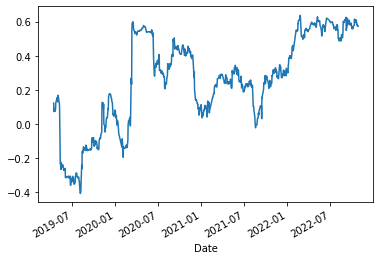

In [72]:
third.BTC_ROI.rolling(60).corr(third.SP500_ROI).plot()       #往回看60天的相關係數資料

# 比特幣與台股間的相關性

<AxesSubplot:xlabel='Date'>

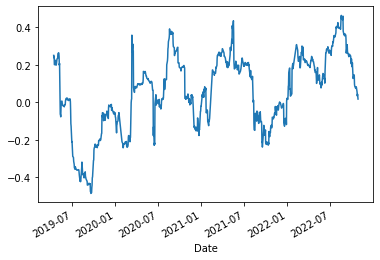

In [73]:
third.BTC_ROI.rolling(60).corr(third.TW_ROI).plot()

# 回歸分析
討論台股的報酬率ROI是否受到美股市場、匯率變化及比特幣的影響

In [74]:
import statsmodels.api as sm

C:\Users\linnn\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 同期模型

In [79]:
third['TWDUSD_ROI'] = third.price_TWDUSD.pct_change()    #增加匯率的報酬率(變化率)欄位資料
y = third.TW_ROI
x = sm.add_constant(third[['SP500_ROI','TWDUSD_ROI','BTC_ROI']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 TW_ROI   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     34.46
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           4.42e-21
Time:                        19:42:31   Log-Likelihood:                 2799.5
No. Observations:                 899   AIC:                            -5591.
Df Residuals:                     895   BIC:                            -5572.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.887      0.3

# 結論
1. 台股會受美股正向的影響
2. 台股受匯率負向的影響    (美元愈高，台幣的報酬率就越低)
3. 台股不受比特幣影響      (相關係數=0.6% 太不顯著)

# 預測模型

In [84]:
#生成落後期變數
third['SP500_ROI_1'] = third.SP500_ROI.shift()  #函數根據需要的周期數移動索引，用於處理時間序列
third['TWDUSD_ROI_1'] = third.TWDUSD_ROI.shift()
third['BTC_ROI_1'] = third.BTC_ROI.shift()

In [86]:
y = third.TW_ROI.shift()
x = sm.add_constant(third[['SP500_ROI_1','TWDUSD_ROI_1','BTC_ROI_1']])
result = sm.OLS(y,x,missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 TW_ROI   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     34.63
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.54e-21
Time:                        19:56:16   Log-Likelihood:                 2796.6
No. Observations:                 898   AIC:                            -5585.
Df Residuals:                     894   BIC:                            -5566.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003      0.000      0.925   

# 結論
1. 美股對台股有正向的預測能力
2. 匯率對台股沒有預測能力
3. 比特幣對台股沒有預測能力     (相關係數不顯著)